## The Yield Curve
A yield curve is a line that plots yields, or interest rates, of bonds that have differing maturity dates. The slope of the yield curve can predict future interest rate changes and economic activity. There are three main yield curve shapes: normal upward-sloping curve, inverted downward-sloping curve, and flat.

* __Normal curves point to economic expansion__. A normal yield curve shows low yields for shorter-maturity bonds and then increases for bonds with a longer maturity, sloping upwards. 
* __Flat yield curves point to an uncertain future__. A flat yield curve reflects similar yields across all maturities, implying an uncertain economic situation.
* __Downward-sloping curves point to economic recession__. An inverted yield curve slopes downward, with short-term interest rates exceeding long-term rates. Such a yield curve corresponds to periods of economic recession, where investors expect yields on longer-maturity bonds to trend lower in the future.

### Learning objectives
In this example, we'll load recent yield datasets and plot them to see which category they are.

### Setup
We load the [VLQuantitativeFinancePackage.jl](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl) package, and several other external [Julia](https://julialang.org/downloads/https://julialang.org/downloads/) packages, as well as some helper code, by calling the [include(...)](https://docs.julialang.org/en/v1/manual/code-loading/https://docs.julialang.org/en/v1/manual/code-loading/) command on the file `Include.jl`:

In [1]:
using Pkg
Pkg.add(path="https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git")

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`


In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-5660-Examples-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]


### Historical Data
Values for the yield on Treasury securities as a function of duration are compiled daily by the United States Treasury and are available for [download](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics). We've downloaded data for the years `{2021,2022,2023}` We start by specifying which year we are interested in the `year_value` variable:

In [15]:
year_value = "2023";

We call the `MyDailyTreasuryYieldCurveDataSet(…)` function to load the historical data, passing in the `year_value` parameter. The dataset for a particular year is saved in the `dataset` variable, which is a [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl) instance:

In [16]:
dataset = MyDailyTreasuryYieldCurveDataSet(; year = year_value)

Row,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,09/18/2023,5.53,5.56,5.55,5.6,5.51,5.44,5.05,4.74,4.46,4.41,4.32,4.57,4.4
2,09/15/2023,5.51,5.56,5.56,5.6,5.49,5.43,5.02,4.72,4.45,4.41,4.33,4.59,4.42
3,09/14/2023,5.52,5.57,5.55,5.59,5.5,5.42,5.0,4.68,4.42,4.38,4.29,4.57,4.39
4,09/13/2023,5.53,5.56,5.55,5.6,5.51,5.42,4.96,4.64,4.39,4.34,4.25,4.52,4.34
5,09/12/2023,5.52,5.56,5.56,5.58,5.53,5.42,4.98,4.66,4.41,4.36,4.27,4.54,4.35
6,09/11/2023,5.52,5.56,5.55,5.58,5.51,5.4,4.97,4.64,4.4,4.37,4.29,4.56,4.37
7,09/08/2023,5.52,5.56,5.55,5.6,5.49,5.42,4.98,4.68,4.39,4.35,4.26,4.52,4.33
8,09/07/2023,5.52,5.56,5.53,5.59,5.5,5.4,4.94,4.66,4.38,4.35,4.27,4.55,4.36
9,09/06/2023,5.52,5.55,5.55,5.6,5.52,5.44,5.01,4.73,4.44,4.39,4.3,4.56,4.37


### Visualize
To plot the `dataset`, first we setup a `duration` list that holds the duration values for each instrument (in units of years). Some years have different instruments, so we need to check which year we have:

In [17]:
if (year_value == "2021")
    duration = [(1/12), (2/12), (3/12), (6/12), 1, 2, 3, 5, 7, 10, 20, 30];
else
    duration = [(1/12), (2/12), (3/12), (4/12), (6/12), 1, 2, 3, 5, 7, 10, 20, 30];
end;

To plot the `dataset`, we convert it into an `Array` type by passing the `dataset` into the `Matrix(...)` constructor:

In [18]:
data = Matrix(dataset[:,2:end])

179×13 Matrix{Float64}:
 5.53  5.56  5.55  5.6   5.51  5.44  5.05  4.74  4.46  4.41  4.32  4.57  4.4
 5.51  5.56  5.56  5.6   5.49  5.43  5.02  4.72  4.45  4.41  4.33  4.59  4.42
 5.52  5.57  5.55  5.59  5.5   5.42  5.0   4.68  4.42  4.38  4.29  4.57  4.39
 5.53  5.56  5.55  5.6   5.51  5.42  4.96  4.64  4.39  4.34  4.25  4.52  4.34
 5.52  5.56  5.56  5.58  5.53  5.42  4.98  4.66  4.41  4.36  4.27  4.54  4.35
 5.52  5.56  5.55  5.58  5.51  5.4   4.97  4.64  4.4   4.37  4.29  4.56  4.37
 5.52  5.56  5.55  5.6   5.49  5.42  4.98  4.68  4.39  4.35  4.26  4.52  4.33
 5.52  5.56  5.53  5.59  5.5   5.4   4.94  4.66  4.38  4.35  4.27  4.55  4.36
 5.52  5.55  5.55  5.6   5.52  5.44  5.01  4.73  4.44  4.39  4.3   4.56  4.37
 5.51  5.56  5.55  5.59  5.51  5.42  4.94  4.65  4.37  4.35  4.27  4.56  4.38
 5.51  5.55  5.53  5.58  5.47  5.36  4.87  4.57  4.29  4.27  4.18  4.48  4.29
 5.52  5.55  5.56  5.61  5.48  5.37  4.85  4.54  4.23  4.19  4.09  4.39  4.2
 5.55  5.53  5.56  5.6   5.51  5.39  4.9  

To compute the mean value of the yield for each instrument, we use the `mean(...)` function from the [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/) package, we store the mean in the `μ` variable:

In [19]:
μ = mean(data,dims=1) |> vec;

Finally, we plot the yield values for each day in light gray, and the mean value as the black line using the `plot(...)` command from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package:

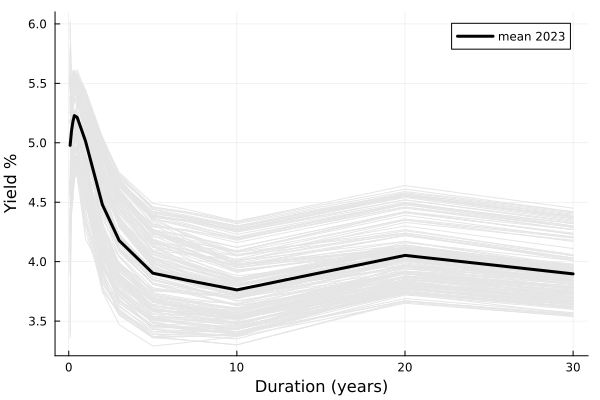

In [20]:
plot(duration, transpose(data), label="", c=:gray90, xlabel="Duration (years)", ylabel="Yield %")
plot!(duration, μ, lw=3, c=:black, label="mean $(year_value)")

### What does yield inversion mean?
* When the yield curve is inverted, it suggests that investors anticipate a future interest rate drop. This could occur during a recession when the Federal Reserve lowers interest rates to boost the economy and help it recover. 
* In the event of a potential recession, a change in Federal Reserve policy, and lower interest rates, investors who prioritize interest income may opt to secure long-term yields in order to safeguard their income stream. This can result in an increase in demand for longer-term bonds, leading to a rise in their prices and a subsequent reduction in long-term yields.
* An inverted yield curve has been a reliable leading indicator of economic recession during the post–World War II era. Proponents of this position maintain that inversion tends to predate a recession 7 to 24 months in advance. Opponents suggest that an inverted yield curve is _not necessarily_ a reliable metric for predicting recession, and particularly in 2023, during a labor shortage and low indebtedness, they have raised questions over whether widespread awareness of its predictive power made it less predictive.